In [48]:
#Importing required libraries
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
#Specifying data path
path = r"C:/Users/marty/Desktop/cells/"

#Creating empty arrays for images and labels
Images = []
Labels = []

### Visualizing sample image

Before moving to the following sections, it would be useful to first visualize a sample image just to get a rough idea of what preprocessing functions we might use.

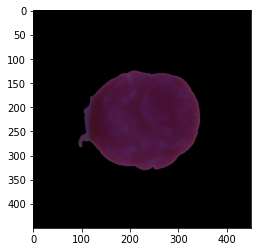

In [60]:
#Choosing sample image
sample_path = r"C:/Users/marty/Desktop/cells/pos/UID_1_1_1_all.bmp"
#Reading image
sample_img = cv2.imread(sample_path)
#Visualizing image
plt.imshow(sample_img)

### Preprocessing

This step in our case involves reading, labelling data and then passing it through our custom OpenCV-based preprocessing function. There are variety of ways in which you could perform the last preprocessing step, but for starters, we are going to do the base minimum - color conversion, image resizing and standardization.

In [49]:
#Reading data
def read_data(path):
    Images = []
    Labels = []
    
    for cat in os.listdir(path):
        folder = os.path.join(path, cat)
        for image_name in os.listdir(folder):
            img = cv2.imread(os.path.join(folder, image_name))
            
            img = preprocessing(img)
            
            #Labelling data
            if cat == 'pos':
                Labels.append(1)
            elif cat == 'neg':
                Labels.append(0)
            
            Images.append(img)
    
    return Images, Labels


#Data preprocessing function
def preprocessing(img):
    
    #Converting to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #Resizing images        
    img = cv2.resize(img, (32, 32))
    
    #Standardization        
    img = np.array(img) / np.max(img)
    
    return img


Images, Labels = read_data(path)

Visualizing preprocessed image

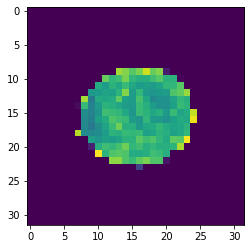

In [61]:
#Passing sample image through our preprocessing function
sample_img = preprocessing(sample_img)
plt.imshow(sample_img)

### Splitting data

As in the previous challenges, after performing basic preprocessing, we need to split our data into train-test datasets. On the other hand, we will also need to change the dimensions of our data as well as use the Keras function for converting our labels to categorical data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(Images, Labels, test_size = 0.3, stratify = Labels)

X_train = np.expand_dims(np.array(X_train), axis = -1)
X_test = np.expand_dims(np.array(X_test), axis = -1)
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

### Model

For the model, we are going to build a LeNet structure CNN. Between each convolutional layers, there are pooling, batch normalization and dropout layers. The last two are used to omit overfitting our data. For the last layer, we flatten our network and pass through two dense layers last having a softmax activation function and two outputs (malignant - non-malignant).

In [45]:
def model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(2, activation = 'softmax')
    ])
    
    return model

For the training, we are using categorical crossentropy loss function we have discussed previous time.

In [46]:
model = model()

model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, validation_split = 0.2, epochs = 10, shuffle = True, batch_size = 4)

Epoch 1/10
494/494 [==============================] - 5s 7ms/step - loss: 0.6519 - accuracy: 0.7918 - val_loss: 0.5013 - val_accuracy: 0.8117
Epoch 2/10
494/494 [==============================] - 3s 6ms/step - loss: 0.4779 - accuracy: 0.7908 - val_loss: 0.4744 - val_accuracy: 0.7976
Epoch 3/10
494/494 [==============================] - 3s 7ms/step - loss: 0.4772 - accuracy: 0.8095 - val_loss: 0.4753 - val_accuracy: 0.7874
Epoch 4/10
494/494 [==============================] - 3s 7ms/step - loss: 0.4626 - accuracy: 0.8029 - val_loss: 0.4522 - val_accuracy: 0.8320
Epoch 5/10
494/494 [==============================] - 3s 7ms/step - loss: 0.4593 - accuracy: 0.7953 - val_loss: 0.4534 - val_accuracy: 0.8097
Epoch 6/10
494/494 [==============================] - 3s 7ms/step - loss: 0.4584 - accuracy: 0.7964 - val_loss: 0.5090 - val_accuracy: 0.7874
Epoch 7/10
494/494 [==============================] - 3s 7ms/step - loss: 0.4605 - accuracy: 0.8045 - val_loss: 0.4333 - val_accuracy: 0.8219
Epoch 